### Word2Vec and Topic Modelling of Pynchon`s novel
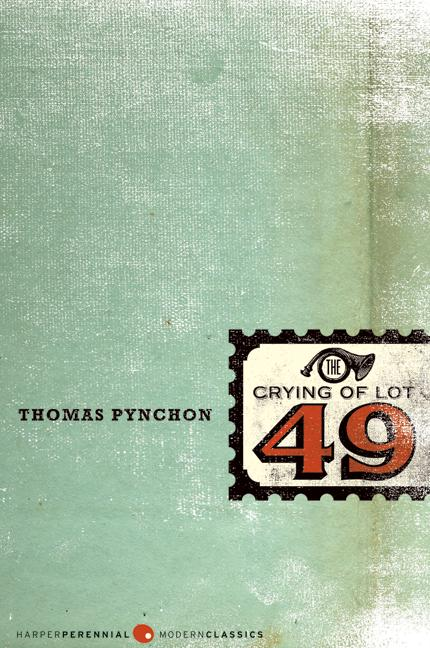

In [1]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

In [3]:
with open("pynchon_the_crying_of_lot.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [4]:
sentences = [simple_preprocess(sentence) for sentence in text.splitlines() if sentence]

In [5]:
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [9]:
model.wv.most_similar("wine", topn=5)

[('leonard', 0.9937812685966492),
 ('must', 0.9935699701309204),
 ('wharfinger', 0.9935142397880554),
 ('get', 0.9933891296386719),
 ('night', 0.993346631526947)]

In [10]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
sentences = [
    [word for word in simple_preprocess(sentence) if word not in stop_words]
    for sentence in text.splitlines() if sentence
]

In [12]:
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [14]:
model.wv.most_similar("paranoia", topn=5)

[('blood', 0.4893665611743927),
 ('someday', 0.483107328414917),
 ('close', 0.47714564204216003),
 ('perhaps', 0.4719890058040619),
 ('black', 0.4718022346496582)]

In [15]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

In [16]:
dictionary = Dictionary(sentences)
corpus = [dictionary.doc2bow(sentence) for sentence in sentences]

In [17]:
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

In [18]:
topics = lda_model.print_topics(num_words=5)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")

Topic 0: 0.007*"oedipa" + 0.005*"said" + 0.004*"like" + 0.004*"come" + 0.004*"one"
Topic 1: 0.010*"oedipa" + 0.007*"said" + 0.006*"metzger" + 0.006*"one" + 0.005*"like"
Topic 2: 0.007*"oedipa" + 0.005*"said" + 0.004*"would" + 0.004*"tell" + 0.004*"name"
Topic 3: 0.018*"said" + 0.014*"oedipa" + 0.007*"one" + 0.007*"metzger" + 0.006*"could"
Topic 4: 0.009*"oedipa" + 0.008*"said" + 0.005*"one" + 0.005*"would" + 0.005*"could"


In [19]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.2 MB/s eta 0:00:00


In [20]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

pyLDAvis.display(lda_display)

In [21]:
pyLDAvis.save_html(lda_display, 'lda_visualization.html')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
